In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import scipy as sc
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.stats.dist_dependence_measures import distance_correlation
from hyppo.independence import HHG, Dcorr
import statsmodels.api as sm
import pingouin as pg

In [8]:
x = [0, 1, 1, -1, 1, 3]
y = [0, 0, 1,  1, 0, 1]
st.spearmanr(x, y)

SpearmanrResult(correlation=0.10369516947304254, pvalue=0.8450147467015816)

In [11]:
z = [[0, 0], [1, 0], [1, 1], [-1, 1], [1, 0], [3, 1]]
st.spearmanr(z)

SpearmanrResult(correlation=0.10369516947304254, pvalue=0.8450147467015816)

In [10]:
r = [2, 3, 3, 1, 3, 4]
t = [1, 1, 2, 2, 1, 2]
print(np.mean(np.array(r)*np.array(t)) - np.mean(r) * np.mean(t))

0.0


In [14]:
r = [2, 3, 3, 1, 3, 6]
t = [1, 1, 4, 4, 1, 4]
ch = np.mean(np.array(r)*np.array(t)) - np.mean(r) * np.mean(t)
print(ch)
print(ch / (np.std(r) * np.std(t)))

0.5
0.21821789023599233


In [9]:
print(7 / (2 * np.sqrt(2)))

2.4748737341529163


In [32]:
x = np.random.uniform(0, 25, 100)
y = np.sin(2*x) + np.cos(x)
print(st.pearsonr(x, y))
print(st.spearmanr(x, y))
print(st.kendalltau(x, y))

(0.033061509265307154, 0.7440099817741874)
SpearmanrResult(correlation=0.053153315331533155, pvalue=0.5994288843907198)
KendalltauResult(correlation=0.0395959595959596, pvalue=0.5594148390405405)


**<h1>1.1<h1>**

In [235]:
N = [20, 50, 100]

**1)**

In [236]:
corr_coefs_1 = [[],[],[],[],[]]
crit_names = ["Pearson      ", "Spearmen     ", "Kendel       ", "Szekely-Rizzo", "HHG(pvalue)  "]
for n in N:   
    X = np.random.uniform(-1, 1, n)
    Y = np.random.uniform(-1, 1, n)

    pearson_1 = st.pearsonr(X, Y)
    spearman_1 = st.spearmanr(X, Y)
    kendall_1 = st.kendalltau(X, Y)
    szek_riz_1 = Dcorr().test(X, Y)
    hhg_1 = HHG().test(X, Y)
    
    corr_coefs_1[0].append(pearson_1)
    corr_coefs_1[1].append(spearman_1)
    corr_coefs_1[2].append(kendall_1)
    corr_coefs_1[3].append(szek_riz_1.pvalue)
    corr_coefs_1[4].append(hhg_1)
    
corr_coefs_1 = np.array(corr_coefs_1).T
for i in range(len(corr_coefs_1)):
    print("n = ", N[i], end='\n')
    for j in range(len(corr_coefs_1[i])):
        #print(crit_names[j], round(corr_coefs_1[i][j], 3), sep='\t', end='\n')
        print(corr_coefs_1[i][j], end='\n')
    if i != len(corr_coefs_1) - 1:
        print()


n =  20
(-0.06801557191868497, 0.7757061704154553)
SpearmanrResult(correlation=-0.24962406015037594, pvalue=0.2885125896971919)
KendalltauResult(correlation=-0.1368421052631579, pvalue=0.4222502818286719)
0.22377622377622378
IndependenceTestOutput(stat=422.8850866608399, pvalue=0.16183816183816183)

n =  50
(-0.1263614393987419, 0.3818877691566732)
SpearmanrResult(correlation=-0.11606242496998799, pvalue=0.4221795604689439)
KendalltauResult(correlation=-0.07918367346938775, pvalue=0.4171410491079254)
0.5363704851353688
IndependenceTestOutput(stat=1772.547864696378, pvalue=0.8391608391608392)

n =  100
(-0.12949985019644433, 0.19909578868103658)
SpearmanrResult(correlation=-0.12778877887788778, pvalue=0.20514696185823397)
KendalltauResult(correlation=-0.08565656565656568, pvalue=0.20668927810155402)
0.3889754379822975
IndependenceTestOutput(stat=9418.781185993854, pvalue=0.4865134865134865)


C:\Users\timo2\AppData\Local\Temp\ipykernel_13132\4252898740.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  corr_coefs_1 = np.array(corr_coefs_1).T


**2)**

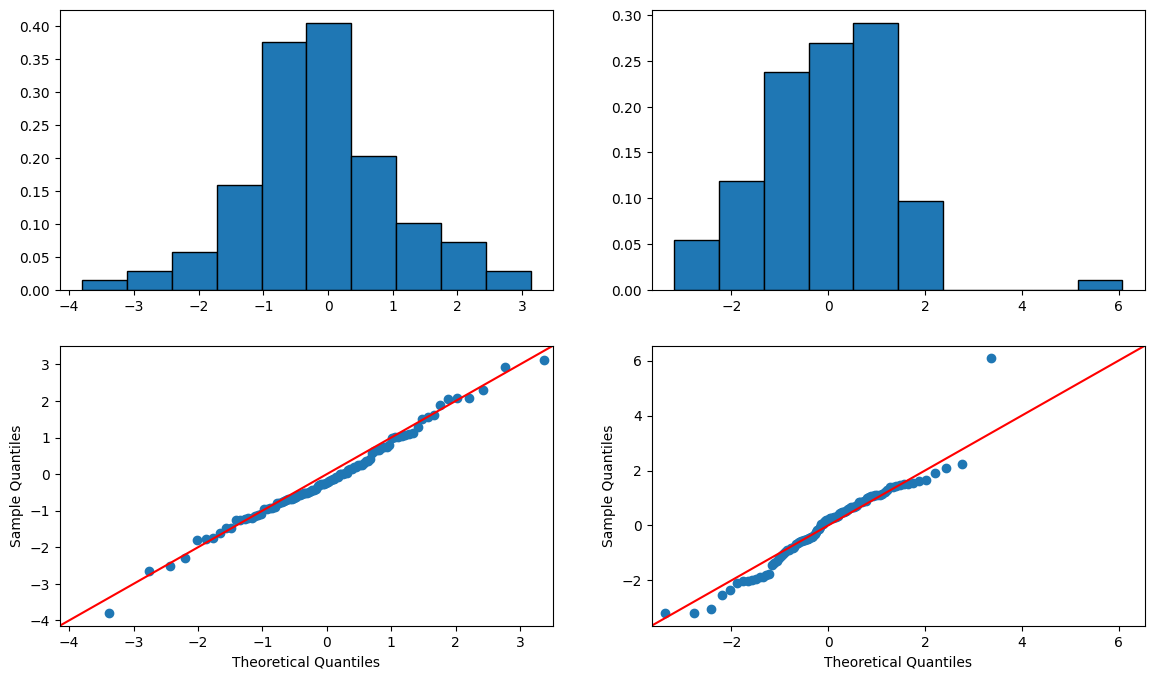

In [238]:
X_Y = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.2], [0.2, 1]], size=(100))
X_0 = np.array(X_Y).T[0]
Y_0 = np.array(X_Y).T[1]
norm_data_1 = []
norm_data_2 = []
for i in range(5):
    norm_data_1.append(np.random.normal(0, 1, 100))
    norm_data_2.append(np.random.normal(0, 1, 100))
norm_data_squared_1 = []
norm_data_squared_2 = []
for i in range(5):
    norm_data_squared_1.append(np.array([el**2 for el in norm_data_1[i]]))
    norm_data_squared_2.append(np.array([el**2 for el in norm_data_2[i]]))
norm_data_square_1 = sum(norm_data_squared_1)
norm_data_square_2 = sum(norm_data_squared_2)
norm_data_two_1 = [np.sqrt(el/5) for el in norm_data_square_1]
norm_data_two_2 = [np.sqrt(el/5) for el in norm_data_square_2]

X = np.array([x_0 / el for x_0, el in zip(X_0, norm_data_two_1)])
Y = np.array([y_0 / el for y_0, el in zip(Y_0, norm_data_two_2)])

fig, ax = plt.subplots(2, 2, figsize = (14, 8))
ax[0][0].hist(X, density=True, edgecolor="black")
ax[0][1].hist(Y, density=True, edgecolor="black")
ax[1][0] = sm.qqplot(X, st.t(5), fit=False, line="45", ax=ax[1][0])
ax[1][1] = sm.qqplot(Y, st.t(5), fit=False, line="45", ax=ax[1][1])

In [240]:
corr_coefs_2 = [[],[],[],[],[]]
for n in N:
    X_Y = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.2], [0.2, 1]], size=(n))
    X_0 = np.array(X_Y).T[0]
    Y_0 = np.array(X_Y).T[1]
    norm_data_1 = []
    norm_data_2 = []
    for i in range(5):
        norm_data_1.append(np.random.normal(0, 1, n))
        norm_data_2.append(np.random.normal(0, 1, n))
    norm_data_squared_1 = []
    norm_data_squared_2 = []
    for i in range(5):
        norm_data_squared_1.append(np.array([el**2 for el in norm_data_1[i]]))
        norm_data_squared_2.append(np.array([el**2 for el in norm_data_2[i]]))
    norm_data_square_1 = sum(norm_data_squared_1)
    norm_data_square_2 = sum(norm_data_squared_2)
    norm_data_two_1 = [np.sqrt(el/5) for el in norm_data_square_1]
    norm_data_two_2 = [np.sqrt(el/5) for el in norm_data_square_2]

    X = np.array([x_0 / el for x_0, el in zip(X_0, norm_data_two_1)])
    Y = np.array([y_0 / el for y_0, el in zip(Y_0, norm_data_two_2)])

    pearson_2 = st.pearsonr(X, Y)
    spearman_2 = st.spearmanr(X, Y)
    kendall_2 = st.kendalltau(X, Y)
    hhg_2 = HHG().test(X, Y)
    szek_riz_2 = Dcorr().test(X, Y)

    corr_coefs_2[0].append(pearson_2)
    corr_coefs_2[1].append(spearman_2)
    corr_coefs_2[2].append(kendall_2)
    corr_coefs_2[3].append(szek_riz_2.pvalue)
    corr_coefs_2[4].append(hhg_2)

corr_coefs_2 = np.array(corr_coefs_2).T
for i in range(len(corr_coefs_2)):
    print("n = ", N[i], end='\n')
    for j in range(len(corr_coefs_2[i])):
        #print(crit_names[j], round(corr_coefs_2[i][j], 3), sep='\t', end='\n')
        print(corr_coefs_2[i][j], sep='\t', end='\n')
    if i != len(corr_coefs_2) - 1:
        print()

n =  20
(0.31264344254323095, 0.17956653241184012)
SpearmanrResult(correlation=0.3413533834586466, pvalue=0.14076469716030804)
KendalltauResult(correlation=0.22105263157894736, pvalue=0.18588304288709082)
0.1848151848151848
IndependenceTestOutput(stat=269.09644039482663, pvalue=0.6853146853146853)

n =  50
(0.1764146167851804, 0.22037647984039838)
SpearmanrResult(correlation=0.23236494597839136, pvalue=0.10441365704086776)
KendalltauResult(correlation=0.14448979591836733, pvalue=0.13871857481064845)
0.1487890313665268
IndependenceTestOutput(stat=2660.5072744817044, pvalue=0.22077922077922077)

n =  100
(0.157803150233493, 0.11687331743932784)
SpearmanrResult(correlation=0.18556255625562554, pvalue=0.0645468733187207)
KendalltauResult(correlation=0.12323232323232325, pvalue=0.06927053219464735)
0.06918241930271474
IndependenceTestOutput(stat=11258.733239200254, pvalue=0.1968031968031968)


C:\Users\timo2\AppData\Local\Temp\ipykernel_13132\4230062382.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  corr_coefs_2 = np.array(corr_coefs_2).T


**3**

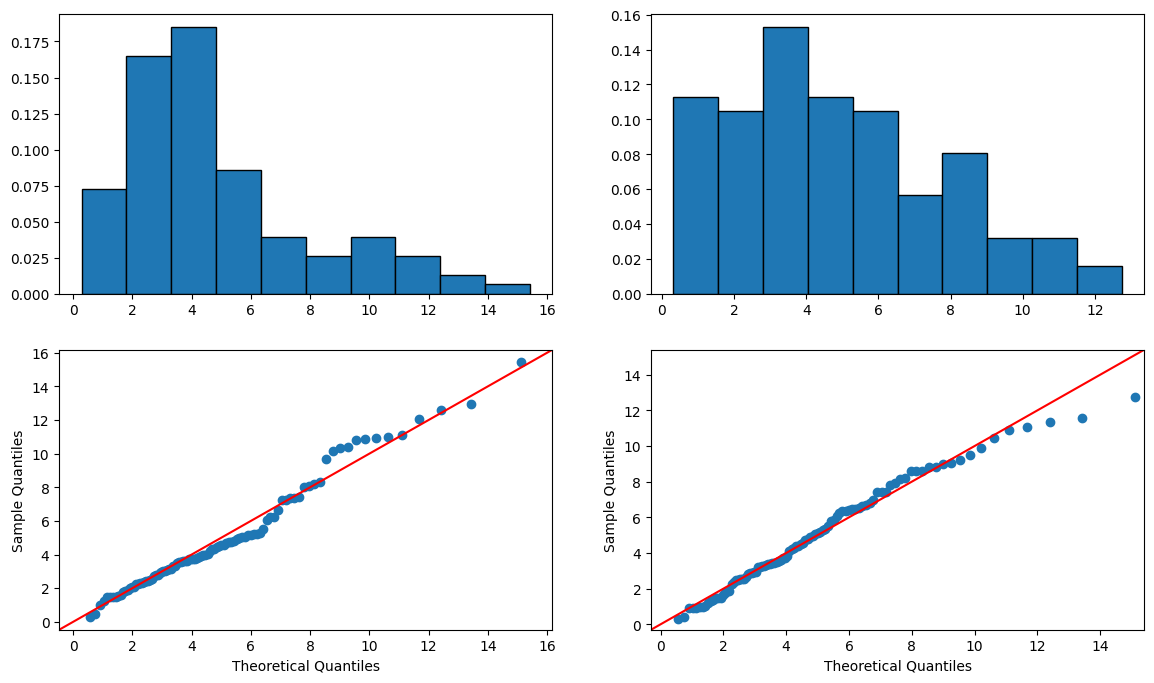

In [242]:
norm_data_squared_X = []
norm_data_squared_Y = []
for i in range(5):
    X_Y = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.2], [0.2, 1]], size=(100))
    X_0 = np.array(X_Y).T[0]
    Y_0 = np.array(X_Y).T[1]
    norm_data_squared_X.append(np.array([el**2 for el in X_0]))
    norm_data_squared_Y.append(np.array([el**2 for el in Y_0]))
X = np.array(sum(norm_data_squared_X))
Y = np.array(sum(norm_data_squared_Y))

fig, ax = plt.subplots(2, 2, figsize = (14, 8))
ax[0][0].hist(X, density=True, edgecolor="black")
ax[0][1].hist(Y, density=True, edgecolor="black")
ax[1][0] = sm.qqplot(X, st.chi2(df=5), fit=False, line="45", ax=ax[1][0])
ax[1][1] = sm.qqplot(Y, st.chi2(df=5), fit=False, line="45", ax=ax[1][1])

In [262]:
corr_coefs_3 = [[],[],[],[],[]]
for n in N:
    norm_data_squared_X = []
    norm_data_squared_Y = []
    for i in range(5):
        X_Y = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.7], [0.7, 1]], size=(n))
        X_0 = np.array(X_Y).T[0]
        Y_0 = np.array(X_Y).T[1]
        norm_data_squared_X.append(np.array([el**2 for el in X_0]))
        norm_data_squared_Y.append(np.array([el**2 for el in Y_0]))
    X = np.array(sum(norm_data_squared_X))
    Y = np.array(sum(norm_data_squared_Y))
    
    pearson_3 = st.pearsonr(X, Y)
    spearman_3 = st.spearmanr(X, Y)
    kendall_3 = st.kendalltau(X, Y)
    hhg_3 = HHG().test(X, Y)
    szek_riz_3 = Dcorr().test(X, Y)

    corr_coefs_3[0].append(pearson_3)
    corr_coefs_3[1].append(spearman_3)
    corr_coefs_3[2].append(kendall_3)
    corr_coefs_3[3].append(szek_riz_3.pvalue)
    corr_coefs_3[4].append(hhg_3)

corr_coefs_3 = np.array(corr_coefs_3).T
for i in range(len(corr_coefs_3)):
    print("n = ", N[i], end='\n')
    for j in range(len(corr_coefs_3[i])):
        #print(crit_names[j], round(corr_coefs_3[i][j], 3), sep='\t', end='\n')
        print(corr_coefs_3[i][j], end='\n')
    if i != len(corr_coefs_3) - 1:
        print()

n =  20
(0.22795289703630053, 0.33374270590793675)
SpearmanrResult(correlation=0.17293233082706763, pvalue=0.4659400851924169)
KendalltauResult(correlation=0.15789473684210525, pvalue=0.3513948581732795)
0.17782217782217782
IndependenceTestOutput(stat=405.82648905312897, pvalue=0.17182817182817184)

n =  50
(0.5365763351120543, 5.8995103481191125e-05)
SpearmanrResult(correlation=0.43999999999999995, pvalue=0.0013867567614981478)
KendalltauResult(correlation=0.30448979591836733, pvalue=0.0018079459572175607)
0.0028163997174181664
IndependenceTestOutput(stat=3886.0158848897854, pvalue=0.01998001998001998)

n =  100
(0.3349245738147111, 0.0006590590317436033)
SpearmanrResult(correlation=0.46861086108610855, pvalue=8.785766852480719e-07)
KendalltauResult(correlation=0.3022222222222223, pvalue=8.379052489525114e-06)
5.537834159516261e-06
IndependenceTestOutput(stat=30850.608352904554, pvalue=0.000999000999000999)


C:\Users\timo2\AppData\Local\Temp\ipykernel_13132\302151367.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  corr_coefs_3 = np.array(corr_coefs_3).T


**<h1>1.2<h1>**

In [245]:
babies_data = []
with open("babies.txt") as f:
    lines = f.readlines()
    for line in lines:
        babies_data.append(line.split())
columns_babies = babies_data[0]
babies_data_num = babies_data[1:]
babies_data = []
for line in babies_data_num:
    new_line = []
    for el in line:
        new_line.append(float(el))
    babies_data.append(new_line)
df_babies = pd.DataFrame(data=babies_data, columns=columns_babies)
df_babies.head()

,x1,x2,Age
0,0.729,280.1,3.0
1,0.785,402.2,3.0
2,0.625,351.4,3.0
3,0.604,315.5,3.0
4,0.701,306.0,3.0


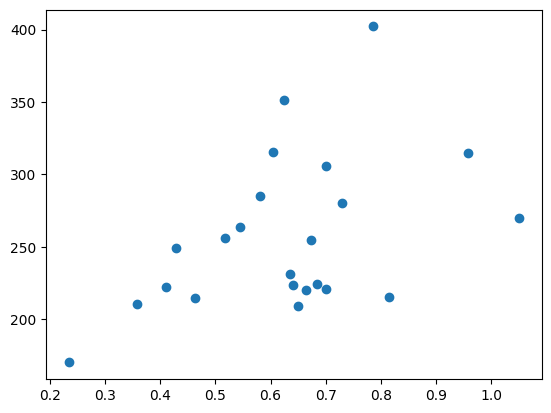

In [246]:
plt.scatter(df_babies["x1"], df_babies["x2"])

Text(0, 0.5, 'x2')

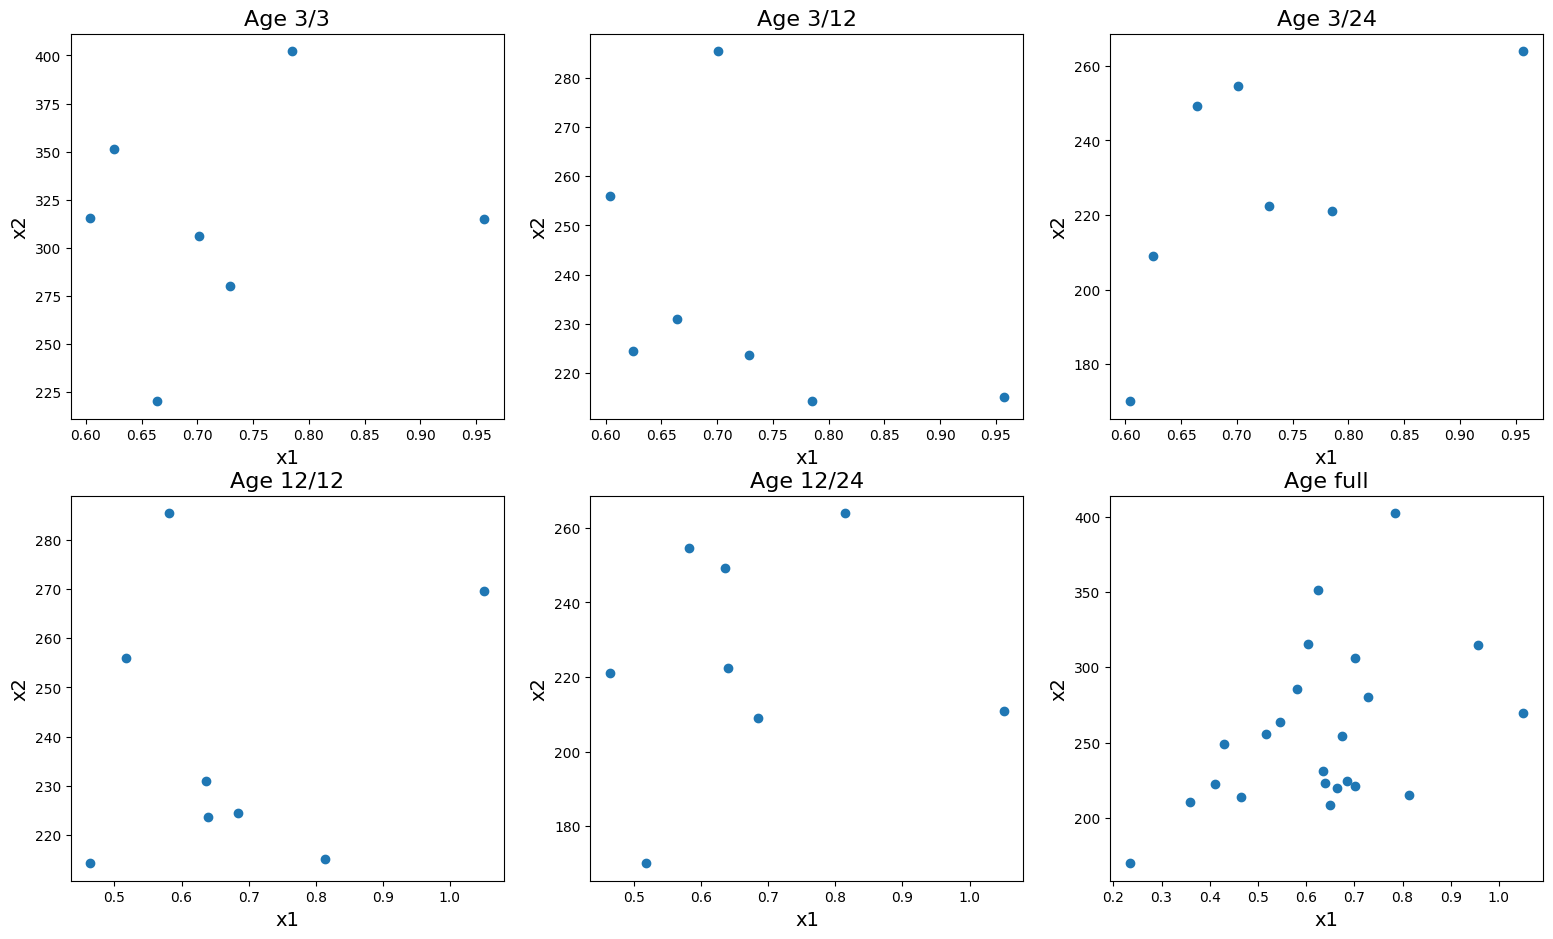

In [247]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(19, 11))

ax[0, 0].scatter(df_babies["x1"][df_babies["Age"] == 3], df_babies["x2"][df_babies["Age"] == 3])
ax[0, 0].set_title("Age 3/3", fontsize=16)
ax[0, 0].set_xlabel("x1", fontsize=14)
ax[0, 0].set_ylabel("x2", fontsize=14)
ax[0, 1].scatter(df_babies["x1"][df_babies["Age"] == 3], df_babies["x2"][df_babies["Age"] == 12][0:-1])
ax[0, 1].set_title("Age 3/12", fontsize=16)
ax[0, 1].set_xlabel("x1", fontsize=14)
ax[0, 1].set_ylabel("x2", fontsize=14)
ax[0, 2].scatter(df_babies["x1"][df_babies["Age"] == 3], df_babies["x2"][df_babies["Age"] == 24][0:-1])
ax[0, 2].set_title("Age 3/24", fontsize=16)
ax[0, 2].set_xlabel("x1", fontsize=14)
ax[0, 2].set_ylabel("x2", fontsize=14)

ax[1, 0].scatter(df_babies["x1"][df_babies["Age"] == 12], df_babies["x2"][df_babies["Age"] == 12])
ax[1, 0].set_title("Age 12/12", fontsize=16)
ax[1, 0].set_xlabel("x1", fontsize=14)
ax[1, 0].set_ylabel("x2", fontsize=14)
ax[1, 1].scatter(df_babies["x1"][df_babies["Age"] == 12], df_babies["x2"][df_babies["Age"] == 24])
ax[1, 1].set_title("Age 12/24", fontsize=16)
ax[1, 1].set_xlabel("x1", fontsize=14)
ax[1, 1].set_ylabel("x2", fontsize=14)
ax[1, 2].scatter(df_babies["x1"], df_babies["x2"])
ax[1, 2].set_title("Age full", fontsize=16)
ax[1, 2].set_xlabel("x1", fontsize=14)
ax[1, 2].set_ylabel("x2", fontsize=14)

In [248]:
X1 = [np.array(df_babies["x1"]), np.array(df_babies["x1"][df_babies["Age"] == 3]), np.array(df_babies["x1"][df_babies["Age"] == 3]), np.array(df_babies["x1"][df_babies["Age"] == 3]), np.array(df_babies["x1"][df_babies["Age"] == 12]), np.array(df_babies["x1"][df_babies["Age"] == 12])]
X2 = [np.array(df_babies["x2"]), np.array(df_babies["x2"][df_babies["Age"] == 3]), np.array(df_babies["x2"][df_babies["Age"] == 12][:-1]), np.array(df_babies["x2"][df_babies["Age"] == 24][0:-1]), np.array(df_babies["x2"][df_babies["Age"] == 12]), np.array(df_babies["x2"][df_babies["Age"] == 24])]

In [251]:
corr_coefs_babies = [[],[],[],[],[]]

for i in range(len(X1)):
    pearson_babies = st.pearsonr(X1[i], X2[i])
    spearman_babies = st.spearmanr(X1[i], X2[i])
    kendall_babies = st.kendalltau(X1[i], X2[i])
    hhg_babies = HHG().test(X1[i], X2[i])
    szek_riz_babies = Dcorr().test(X1[i], X2[i])

    corr_coefs_babies[0].append(pearson_babies)
    corr_coefs_babies[1].append(spearman_babies)
    corr_coefs_babies[2].append(kendall_babies)
    corr_coefs_babies[3].append(szek_riz_babies.pvalue)
    corr_coefs_babies[4].append(hhg_babies)

corr_coefs_babies = np.array(corr_coefs_babies).T
age_var = ["Age full", "Age 3/3", "Age 3/12", "Age 3/24", "Age 12/12", "Age 12/24"]
for i in range(len(corr_coefs_babies)):
    print(age_var[i], end='\n')
    for j in range(len(corr_coefs_babies[i])):
        #print(crit_names[j], round(corr_coefs_babies[i][j], 3), sep='\t', end='\n')
        print(corr_coefs_babies[i][j], end='\n')
    if i != len(corr_coefs_babies) - 1:
        print()

Age full
(0.4499200190112412, 0.031230270862916083)
SpearmanrResult(correlation=0.3696565469904723, pvalue=0.08255514521260335)
KendalltauResult(correlation=0.27722826630435854, pvalue=0.06440338826945631)
0.09234540060196023
IndependenceTestOutput(stat=405.62341907882615, pvalue=0.5104895104895105)

Age 3/3
(0.18105713657630423, 0.6976410759211905)
SpearmanrResult(correlation=0.0, pvalue=1.0)
KendalltauResult(correlation=0.04761904761904762, pvalue=1.0)
0.8471528471528471
IndependenceTestOutput(stat=18.09027777777778, pvalue=0.7072927072927073)

Age 3/12
(-0.44622022419293594, 0.315580331480644)
SpearmanrResult(correlation=-0.7142857142857144, pvalue=0.07134356146753759)
KendalltauResult(correlation=-0.5238095238095238, pvalue=0.1361111111111111)
0.16183816183816183
IndependenceTestOutput(stat=21.28472222222222, pvalue=0.5274725274725275)

Age 3/24
(0.6415595880099387, 0.12038448884061355)
SpearmanrResult(correlation=0.6785714285714287, pvalue=0.0937502539598313)
KendalltauResult(corr

C:\Users\timo2\AppData\Local\Temp\ipykernel_13132\2620815422.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  corr_coefs_babies = np.array(corr_coefs_babies).T


**<h1>1.3<h1>**

In [257]:
data = []
with open("televisions.dat.txt") as f:
    lines = f.readlines()
    for line in lines:
        data.append(line.split())
columns = ["Country", "Life expectancy", "People per television", "People per physician", "Female life expectancy", "Male life expectancy"]
data_num = data
data = []
for i in range(len(data_num)):
    line = data_num[i]
    new_line = []
    for j in range(len(line)):
        if j == 0:
            new_line.append(i + 1)   
        elif len(line) == 6:
            new_line.append(float(line[j]))
        elif j != 1:
            new_line.append(float(line[j]))
    data.append(new_line)     
df = pd.DataFrame(data=data, columns=columns)
df.head()

,Country,Life expectancy,People per television,People per physician,Female life expectancy,Male life expectancy
0,1,70.5,4.0,370.0,74.0,67.0
1,2,53.5,315.0,6166.0,53.0,54.0
2,3,65.0,4.0,684.0,68.0,62.0
3,4,76.5,1.7,449.0,80.0,73.0
4,5,70.0,8.0,643.0,72.0,68.0


Text(0, 0.5, 'Life expectancy')

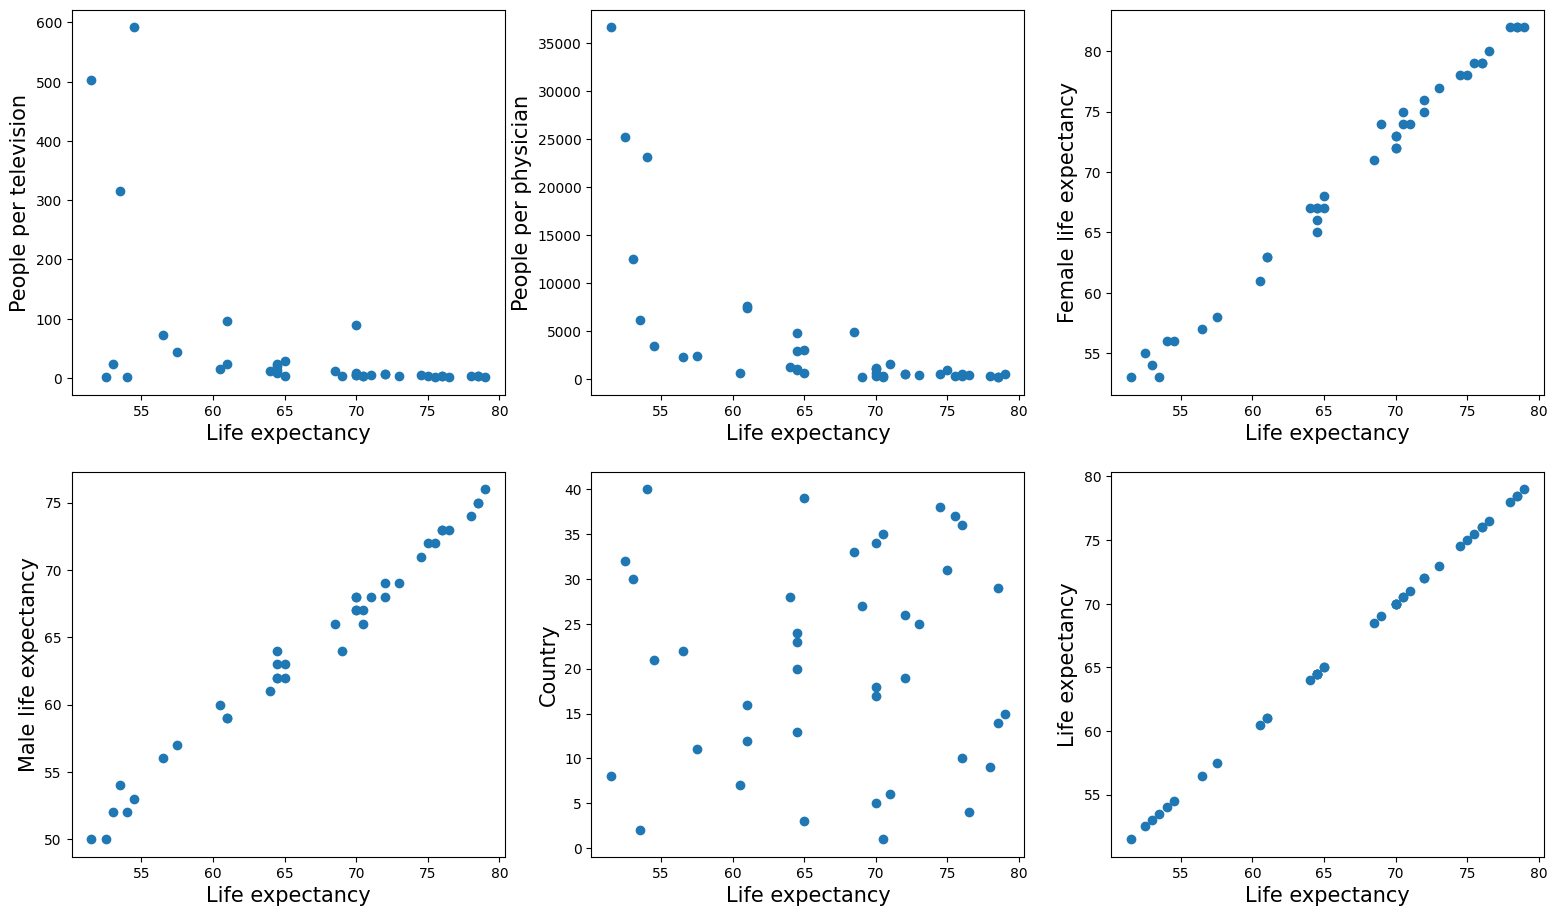

In [258]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(19, 11))

ax[0, 0].scatter(df["Life expectancy"], df["People per television"])
ax[0, 0].set_xlabel("Life expectancy", fontsize=15)
ax[0, 0].set_ylabel("People per television", fontsize=15)
ax[0, 1].scatter(df["Life expectancy"], df["People per physician"])
ax[0, 1].set_xlabel("Life expectancy", fontsize=15)
ax[0, 1].set_ylabel("People per physician", fontsize=15)
ax[0, 2].scatter(df["Life expectancy"], df["Female life expectancy"])
ax[0, 2].set_xlabel("Life expectancy", fontsize=15)
ax[0, 2].set_ylabel("Female life expectancy", fontsize=15)

ax[1, 0].scatter(df["Life expectancy"], df["Male life expectancy"])
ax[1, 0].set_xlabel("Life expectancy", fontsize=15)
ax[1, 0].set_ylabel("Male life expectancy", fontsize=15)
ax[1, 1].scatter(df["Life expectancy"], df["Country"])
ax[1, 1].set_xlabel("Life expectancy", fontsize=15)
ax[1, 1].set_ylabel("Country", fontsize=15)
ax[1, 2].scatter(df["Life expectancy"], df["Life expectancy"])
ax[1, 2].set_xlabel("Life expectancy", fontsize=15)
ax[1, 2].set_ylabel("Life expectancy", fontsize=15)

In [259]:
X_1 = np.array(df["Life expectancy"])
X_2 = [np.array(df["People per television"]), np.array(df["People per physician"]), np.array(df["Female life expectancy"]), np.array(df["Male life expectancy"])]

In [260]:
corr_coefs_ = [[],[],[],[],[]]

for i in range(len(X_2)):
    pearson_ = st.pearsonr(X_1, X_2[i])
    spearman_ = st.spearmanr(X_1, X_2[i])
    kendall_ = st.kendalltau(X_1, X_2[i])
    hhg_ = HHG().test(X_1, X_2[i])
    szek_riz_ = Dcorr().test(X_1, X_2[i])

    corr_coefs_[0].append(pearson_)
    corr_coefs_[1].append(spearman_)
    corr_coefs_[2].append(kendall_)
    corr_coefs_[3].append(szek_riz_.pvalue)
    corr_coefs_[4].append(hhg_)

corr_coefs_ = np.array(corr_coefs_).T
names = ["People per television", "People per physician", "Female life expectancy", "Male life expectancy"]
for i in range(len(corr_coefs_)):
    print(names[i], end='\n')
    for j in range(len(corr_coefs_[i])):
        #print(crit_names[j], round(corr_coefs_[i][j], 3), sep='\t', end='\n')
        print(corr_coefs_[i][j], end='\n')
    if i != len(corr_coefs_) - 1:
        print()

People per television
(-0.5224473982774769, 0.0005438824999862645)
SpearmanrResult(correlation=-0.6710991658774383, pvalue=2.144248037964038e-06)
KendalltauResult(correlation=-0.5613653562187101, pvalue=5.127824896232102e-07)
0.0003978095601034283
IndependenceTestOutput(stat=8429.137736258906, pvalue=0.000999000999000999)

People per physician
(-0.6659966705240263, 2.7293600040409158e-06)
SpearmanrResult(correlation=-0.8041145823199252, pvalue=4.1226648047772115e-10)
KendalltauResult(correlation=-0.6191161949803965, pvalue=2.595547446796054e-08)
3.696419305209925e-06
IndependenceTestOutput(stat=9593.675293068396, pvalue=0.000999000999000999)

Female life expectancy
(0.9958149370986341, 4.2222530762112974e-41)
SpearmanrResult(correlation=0.9918153200754104, pvalue=1.397479438010569e-35)
KendalltauResult(correlation=0.9532072476346439, pvalue=2.7912461302166664e-17)
1.8810565676445598e-10
IndependenceTestOutput(stat=39137.98920586794, pvalue=0.000999000999000999)

Male life expectancy
(0

C:\Users\timo2\AppData\Local\Temp\ipykernel_13132\3140111120.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  corr_coefs_ = np.array(corr_coefs_).T


<AxesSubplot:title={'center':'Partial correlations'}>

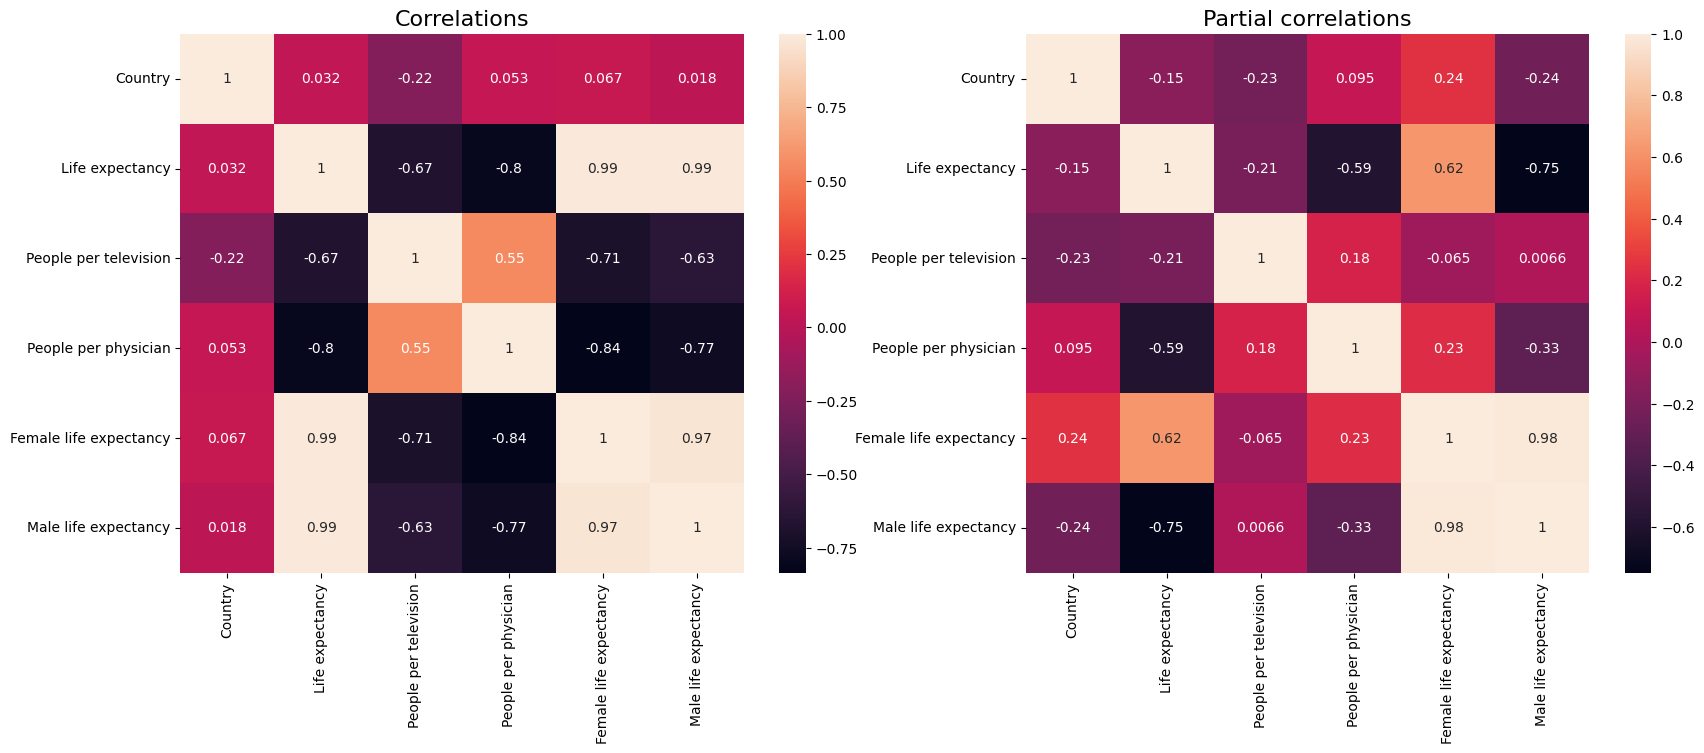

In [261]:
corr = df.corr(method="spearman")
pcorr = pg.pcorr(df)

fig, ax = plt.subplots(1, 2, figsize=(20, 7))
ax[0].set_title("Correlations", fontsize=16)
sb.heatmap(corr, annot=True, ax=ax[0])
ax[1].set_title("Partial correlations", fontsize=16)
sb.heatmap(pcorr, annot=True, ax=ax[1])